Δρακάκη Αικατερίνη <br>
1115201300041 <br>
Μακρυγεώργος Νικόλαος <br>
1115201500238

****
# 2η Ασκηση ΤΕΔ
****

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns #optional but nice to have!!!
import matplotlib.pyplot as plt 
%matplotlib inline

from folium.map import *
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import MeasureControl
from folium.plugins import FloatImage
import folium
import os

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import seaborn as sn
sn.set(style = "whitegrid")
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [2]:
df = pd.read_csv('crime.csv',encoding = "ISO-8859-1",low_memory = False)

In [3]:
# Diagrafei ton steilwn REPORTING_AREA,  UCR_PART,   STREET
# mallon den tha xreiastoun argotera

del df['REPORTING_AREA']
del df['UCR_PART']
del df['STREET']

Αλλαγή του nan στη στήλη SHOOTING με Ν

In [4]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [5]:
df['SHOOTING'] = df['SHOOTING'].fillna("N")

In [6]:
df['SHOOTING'].unique()


array(['N', 'Y'], dtype=object)

***
Ερώτημα 1. <br>
Πλήθος εγκλημάτων ανα χρόνο.

In [7]:
dd = df.groupby(['YEAR'])['INCIDENT_NUMBER'].count().reset_index(name="count")
dd

,YEAR,count
0,2015,53392
1,2016,99134
2,2017,100938
3,2018,74356


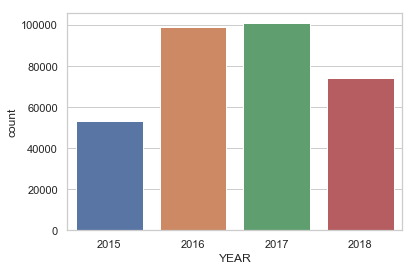

In [8]:
a = sn.barplot(x = "YEAR", y = "count", data = dd)

***
Πλήθος εγλημάτων ανα μήνα.

In [9]:
dd = df.groupby(['MONTH'])['INCIDENT_NUMBER'].count().reset_index(name="count")
dd

,MONTH,count
0,1,23625
1,2,21661
2,3,24156
3,4,24108
4,5,26242
5,6,30622
6,7,34640
7,8,35137
8,9,34023
9,10,26437


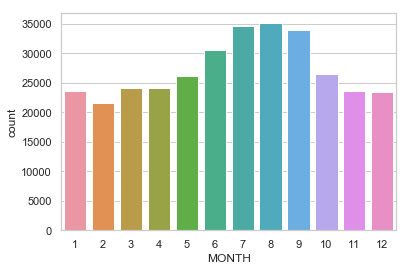

In [10]:
a = sn.barplot(x = "MONTH", y = "count", data = dd)

***
Πλήθος εγλημάτων ανα ημέρα.

In [11]:
dd = df.groupby(['DAY_OF_WEEK'])['INCIDENT_NUMBER'].count().reset_index(name="count")
dd

,DAY_OF_WEEK,count
0,Friday,49758
1,Monday,46970
2,Saturday,45969
3,Sunday,41374
4,Thursday,47872
5,Tuesday,47726
6,Wednesday,48151


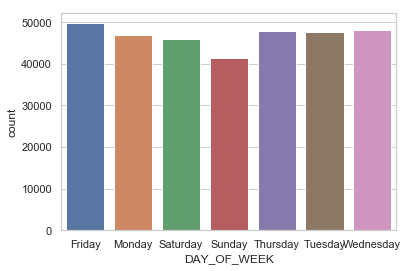

In [12]:
a = sn.barplot(x = "DAY_OF_WEEK", y = "count", data = dd)

***
Πλήθος εγλημάτων ανα περιοχή.

In [13]:
dd = df.groupby(['DISTRICT'])['INCIDENT_NUMBER'].count().reset_index(name="count")
dd

,DISTRICT,count
0,A1,36735
1,A15,6663
2,A7,13634
3,B2,51288
4,B3,36400
5,C11,43817
6,C6,24190
7,D14,20632
8,D4,43338
9,E13,17981


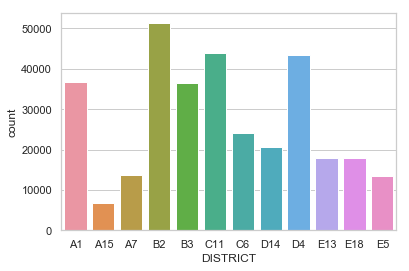

In [14]:
a = sn.barplot(x = "DISTRICT", y = "count", data = dd)

****
****
Ερώτημα 2.

In [15]:
df = pd.read_csv('crime.csv', encoding = "ISO-8859-1",low_memory = False)
df['SHOOTING'] = df['SHOOTING'].fillna("N")
d1 = df[df.SHOOTING != 'N']

Χρονιά με τα περισσότερα SHOOTINGS.

In [16]:
d1 = d1.groupby(['YEAR'])['SHOOTING'].count().reset_index(name="count")
d1 = d1.sort_values(by=['count'], ascending=False)
d1.head(1)

,YEAR,count
2,2017,371


Περιοχή με τα περισσότερα SHOOTINGS.

In [17]:
df = pd.read_csv('crime.csv', encoding = "ISO-8859-1",low_memory = False)
df['SHOOTING'] = df['SHOOTING'].fillna("N")
d1 = df[df.SHOOTING != 'N']

In [18]:
d1 = d1.groupby(['DISTRICT'])['SHOOTING'].count().reset_index(name="count")
d1 = d1.sort_values(by=['count'], ascending=False)
d1.head(1)

,DISTRICT,count
3,B2,352


***
***
Ερώτημα 3.

In [19]:
df = pd.read_csv('crime.csv', encoding = "ISO-8859-1",low_memory = False)
df['SHOOTING'] = df['SHOOTING'].fillna("N")

In [20]:
df1 = df[['HOUR']]

In [21]:
list = df1['HOUR'].tolist()
list2 = []
for i in list:
    if i >= 18 or i <= 6:
        list2.append('Night')
    else:
        list2.append('Day')

In [22]:
df['Day_or_Night'] = list2

In [23]:
d1 = df.groupby(['Day_or_Night'])['INCIDENT_NUMBER'].count().reset_index(name="count")

Περισσότερα εγκλήματα.Μέρα ή Νύχτα ?

In [24]:
d1 = d1.sort_values(by=['count'], ascending=False)
d1.head(1)

,Day_or_Night,count
0,Day,184268


***
***
Ερώτημα 4.

In [25]:
d1 = df[df.Day_or_Night != 'Night']

In [26]:
d1 = d1.groupby(['OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index(name="count")
d1 = d1.sort_values(by=['count'], ascending=False)
d1.head(1)

,OFFENSE_CODE_GROUP,count
42,Motor Vehicle Accident Response,21852


***
***
Ερώτημα 5.

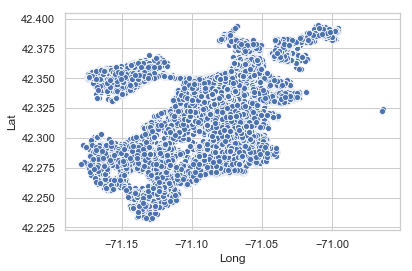

In [27]:
location = df[['Lat','Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long']< -60)]

ax = sns.scatterplot(x="Long",y="Lat",data = location)

K-Means

In [28]:
def k_means(n_clusters, location):
    kmeans = KMeans(n_clusters).fit(location)
    kmeans.predict(location)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    colors = kmeans.labels_.astype(float)
    im = plt.scatter(location['Long'], location['Lat'], cmap='viridis', c= colors , s=20, alpha=0.5, edgecolor = "k")
    plt.colorbar(im)

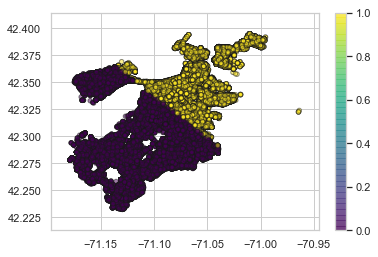

In [29]:
#2 clusters
k_means(2, location)

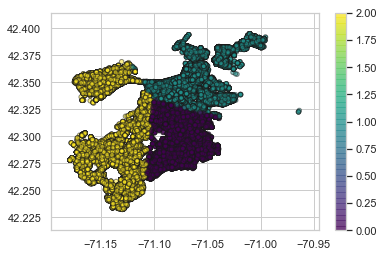

In [30]:
#3 clusters
k_means(3,location)

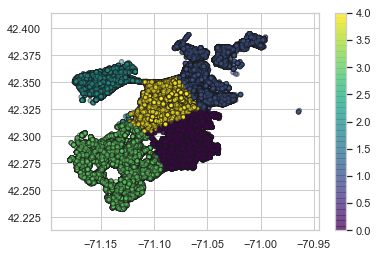

In [31]:
#5 clusters
k_means(5, location)

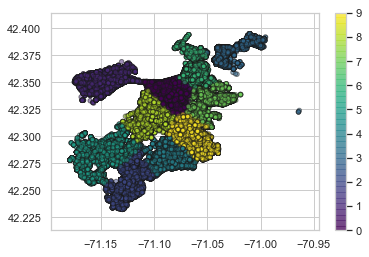

In [32]:
#10 clusters
k_means(10, location)

***
***
Cluster για location και OFFENSE_CODE

In [45]:
locat_offen = df[['Lat','Long','OFFENSE_CODE']]
locat_offen = locat_offen.dropna()

locat_offen['Lat'] = locat_offen['Lat'].fillna("N")
locat_offen['Long'] = locat_offen['Long'].fillna("N")
locat_offen['OFFENSE_CODE'] = locat_offen['OFFENSE_CODE'].fillna("N")

locat_offen = locat_offen.loc[(locat_offen['Lat']>40) & (locat_offen['Long']< -60) & (locat_offen['OFFENSE_CODE'] > 1000)]

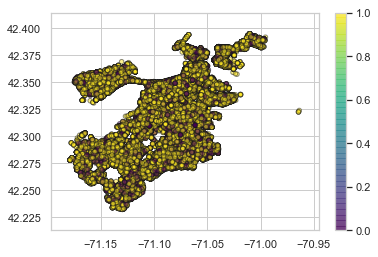

In [46]:
k_means(2, locat_offen)

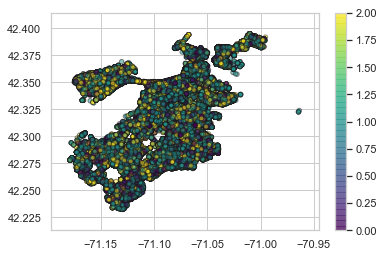

In [47]:
k_means(3, locat_offen)

***
***
Cluster για location και MONTH

In [36]:
locat_month = df[['Lat','Long','MONTH']]
locat_month = locat_offen.dropna()

locat_month['Lat'] = locat_month['Lat'].fillna("N")
locat_month['Long'] = locat_month['Long'].fillna("N")
locat_month = locat_month.loc[(locat_month['Lat']>40) & (locat_month['Long']< -60)]

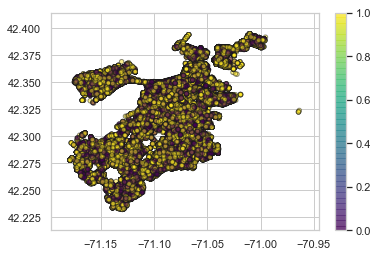

In [37]:
k_means(2, locat_month)

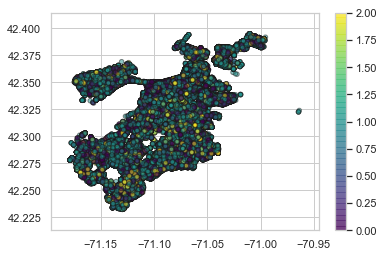

In [38]:
k_means(3, locat_month)

In [39]:
def Kmeans2(cluster, loc, k):
    km = KMeans(n_clusters = cluster)
    km.fit(loc)
    km.predict(loc)
    labels = km.labels_
    
    fig = plt.figure(1, figsize=(7,7))
    ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
    ax.scatter(loc['Lat'], loc['Long'], loc['OFFENSE_CODE'], c=labels.astype(np.float), edgecolor = "k", s = 30)

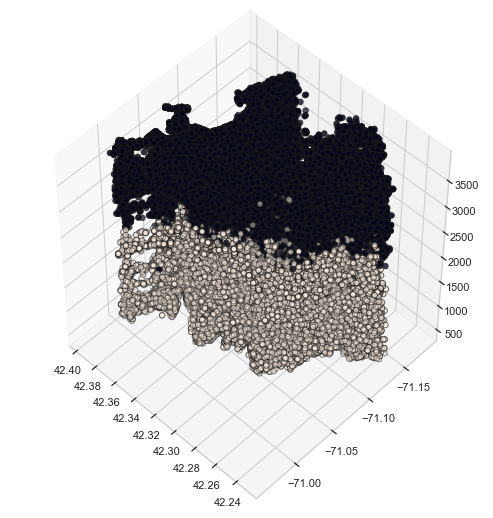

In [40]:
Kmeans2(2, locat_offen, 1)

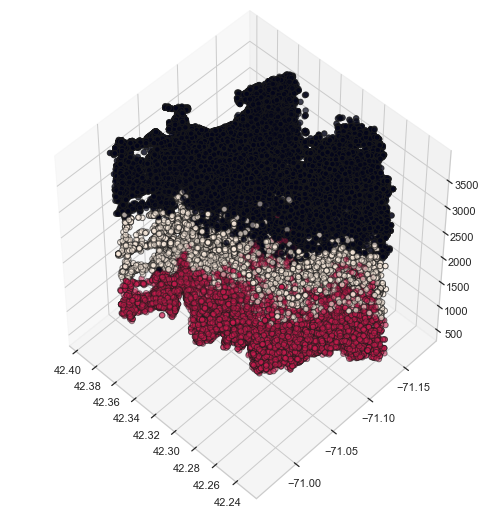

In [41]:
Kmeans2(3, locat_offen, 1)

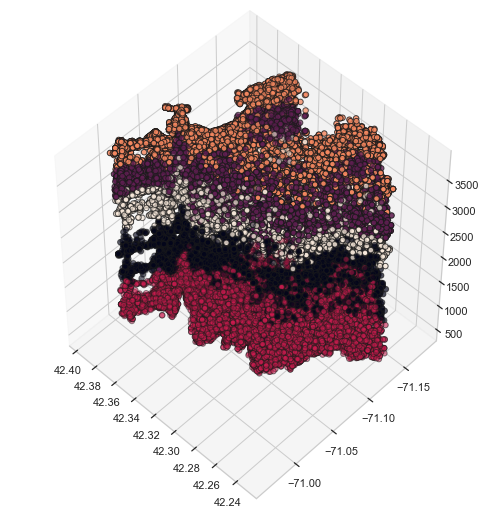

In [42]:
Kmeans2(5, locat_offen, 1)

***
***
#          BONUS

In [43]:
df = pd.read_csv('crime.csv', encoding = "ISO-8859-1",low_memory = False)
drug = df.loc[df['OFFENSE_CODE_GROUP'] == 'Drug Violation']
drug = drug[['Lat','Long']]
drug = drug.dropna()

l1 = drug['Lat'].tolist()
l2 = drug['Long'].tolist()

In [44]:
map = folium.Map(width=1000, height=500, location=(42.361145, -71.057083), zoom_start=12)
mc = MarkerCluster().add_to(map)

for i in range(0,6000):
    mc.add_child(folium.Marker(location = [l1[i] , l2[i]]))
    map.add_child(mc)
display(map)